** note you need to restart kernel in order to register changes you made to modules (approach1 and approach2)

In [5]:
import json

def get_dataset(dataset_string):
  with open(dataset_string, 'r') as file:
      data = json.load(file)
  return data

### sample code to test different approaches w/ different models, also different iterations of synthetic dataset

In [7]:
from approach1 import approach1
# from approach2 import approach2
from llms.llm_interaction import GroqClient

patient_records2 = get_dataset('datasets/patient_records2.json')
llm_client = GroqClient(model="llama-3.3-70b-versatile")

output = approach1(patient_records2[0:5], llm_client)
# pred, true = approach2(patient_records2[0:5], llm_client)

Groq client initialized with model: llama-3.3-70b-versatile


Processing records: 100%|██████████| 5/5 [00:02<00:00,  1.82record/s]

accuracy of model over 5 generated records: 0.8
precision of model over 5 generated records: 0.75
recall of model over 5 generated records: 1.0
f1 of model over 5 generated records: 0.8571428571428571


In [3]:
default_template = ("""
                    Given the following patient record, identify if it matches the following semantic regex pattern: {regex} 
Return either true OR false, nothing else.\n\nPatient Record: {record_text}""")

prompt_template0 = ("""
Patient Data (Natural Language):
{record_text}

Context:
Extract semantic symbols from the provided patient data and determine if a match exists.

Task:
Determine whether at least one match of the following semantic regex is implied or explicitly present in the patient data above.

Semantic Regex:
{regex}

Return exactly one word: "True" or "False".
""")

prompt_template1 = ("""
Instruction: Given the following patient data, identify if it matches the following semantic regex pattern: {regex}. Return either true or false, nothing else.
                    
Patient Data (Natural Language): {record_text}
""")

prompt_template2 = ("""
You are a clinical language analysis system.

Input:
- Patient Record: {record_text}
- Semantic Regex Pattern: {regex}

Objective:
Assess whether the patient record semantically satisfies the meaning of the regex.

Output:
Respond only with one word: True or False. Do not include explanations.
""")

prompt_template3 = ("""
Question:
Does the following patient record match the meaning of the given semantic regex?

Semantic Regex: {regex}

Patient Record: {record_text}

Answer with a single Boolean value: True or False.
""")


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from metrics.metrics import f1_score
from approach1 import approach1


def run_approach1_on_models(patient_records, models, prompt_templates):
    rows = []
    for model in models:
        llm_client = GroqClient(model=model)
        for i, template in enumerate(prompt_templates):
            output = approach1(patient_records, llm_client, prompt_template=template)
            print(output)
            row = {
                "model": model,
                "id": str(i),
                "f1": output['f1'],
                "time-elapsed": output['time_elapsed']
                
            }
            rows.append(row)
    return rows
# example usage
models = ["llama-3.3-70b-versatile", "qwen-2.5-32b", "gemma2-9b-it"]
prompt_templates = [default_template, prompt_template0, prompt_template1, prompt_template2, prompt_template3]
results = run_approach1_on_models(patient_records2[:25], models, prompt_templates)
df = pd.DataFrame(results)

Groq client initialized with model: llama-3.3-70b-versatile


Processing records: 100%|██████████| 25/25 [00:50<00:00,  2.03s/record]


accuracy of model over 25 generated records: 0.68
precision of model over 25 generated records: 0.6190476190476191
recall of model over 25 generated records: 1.0
f1 of model over 25 generated records: 0.7647058823529412
{'approach': 'Approach 1', 'dataset': 'not defined', 'accuracy': 0.68, 'precision': 0.6190476190476191, 'recall': 1.0, 'f1': 0.7647058823529412, 'time_elapsed': 50.64864206314087, 'model': 'llama-3.3-70b-versatile', 'provider': 'groq'}


Processing records: 100%|██████████| 25/25 [01:46<00:00,  4.27s/record]


accuracy of model over 25 generated records: 0.76
precision of model over 25 generated records: 0.6842105263157895
recall of model over 25 generated records: 1.0
f1 of model over 25 generated records: 0.8125000000000001
{'approach': 'Approach 1', 'dataset': 'not defined', 'accuracy': 0.76, 'precision': 0.6842105263157895, 'recall': 1.0, 'f1': 0.8125000000000001, 'time_elapsed': 106.70308899879456, 'model': 'llama-3.3-70b-versatile', 'provider': 'groq'}


Processing records: 100%|██████████| 25/25 [01:42<00:00,  4.11s/record]


accuracy of model over 25 generated records: 0.72
precision of model over 25 generated records: 0.6666666666666666
recall of model over 25 generated records: 0.9230769230769231
f1 of model over 25 generated records: 0.7741935483870968
{'approach': 'Approach 1', 'dataset': 'not defined', 'accuracy': 0.72, 'precision': 0.6666666666666666, 'recall': 0.9230769230769231, 'f1': 0.7741935483870968, 'time_elapsed': 102.70503687858582, 'model': 'llama-3.3-70b-versatile', 'provider': 'groq'}


Processing records: 100%|██████████| 25/25 [01:26<00:00,  3.44s/record]


accuracy of model over 25 generated records: 0.68
precision of model over 25 generated records: 0.7272727272727273
recall of model over 25 generated records: 0.6153846153846154
f1 of model over 25 generated records: 0.6666666666666667
{'approach': 'Approach 1', 'dataset': 'not defined', 'accuracy': 0.68, 'precision': 0.7272727272727273, 'recall': 0.6153846153846154, 'f1': 0.6666666666666667, 'time_elapsed': 86.04118204116821, 'model': 'llama-3.3-70b-versatile', 'provider': 'groq'}


Processing records: 100%|██████████| 25/25 [01:36<00:00,  3.85s/record]


accuracy of model over 25 generated records: 0.52
precision of model over 25 generated records: 1.0
recall of model over 25 generated records: 0.07692307692307693
f1 of model over 25 generated records: 0.14285714285714288
{'approach': 'Approach 1', 'dataset': 'not defined', 'accuracy': 0.52, 'precision': 1.0, 'recall': 0.07692307692307693, 'f1': 0.14285714285714288, 'time_elapsed': 96.33387970924377, 'model': 'llama-3.3-70b-versatile', 'provider': 'groq'}
Groq client initialized with model: qwen-2.5-32b


Processing records: 100%|██████████| 25/25 [00:58<00:00,  2.33s/record]


accuracy of model over 25 generated records: 0.92
precision of model over 25 generated records: 0.8666666666666667
recall of model over 25 generated records: 1.0
f1 of model over 25 generated records: 0.9285714285714286
{'approach': 'Approach 1', 'dataset': 'not defined', 'accuracy': 0.92, 'precision': 0.8666666666666667, 'recall': 1.0, 'f1': 0.9285714285714286, 'time_elapsed': 58.22036600112915, 'model': 'qwen-2.5-32b', 'provider': 'groq'}


Processing records: 100%|██████████| 25/25 [02:42<00:00,  6.50s/record]


accuracy of model over 25 generated records: 0.8
precision of model over 25 generated records: 0.7222222222222222
recall of model over 25 generated records: 1.0
f1 of model over 25 generated records: 0.8387096774193548
{'approach': 'Approach 1', 'dataset': 'not defined', 'accuracy': 0.8, 'precision': 0.7222222222222222, 'recall': 1.0, 'f1': 0.8387096774193548, 'time_elapsed': 162.41896176338196, 'model': 'qwen-2.5-32b', 'provider': 'groq'}


Processing records: 100%|██████████| 25/25 [07:50<00:00, 18.83s/record]  


accuracy of model over 25 generated records: 0.96
precision of model over 25 generated records: 1.0
recall of model over 25 generated records: 0.9230769230769231
f1 of model over 25 generated records: 0.9600000000000001
{'approach': 'Approach 1', 'dataset': 'not defined', 'accuracy': 0.96, 'precision': 1.0, 'recall': 0.9230769230769231, 'f1': 0.9600000000000001, 'time_elapsed': 470.7652931213379, 'model': 'qwen-2.5-32b', 'provider': 'groq'}


Processing records: 100%|██████████| 25/25 [02:27<00:00,  5.91s/record]


accuracy of model over 25 generated records: 0.88
precision of model over 25 generated records: 0.8125
recall of model over 25 generated records: 1.0
f1 of model over 25 generated records: 0.896551724137931
{'approach': 'Approach 1', 'dataset': 'not defined', 'accuracy': 0.88, 'precision': 0.8125, 'recall': 1.0, 'f1': 0.896551724137931, 'time_elapsed': 147.81324887275696, 'model': 'qwen-2.5-32b', 'provider': 'groq'}


Processing records: 100%|██████████| 25/25 [02:09<00:00,  5.17s/record]


accuracy of model over 25 generated records: 0.8
precision of model over 25 generated records: 1.0
recall of model over 25 generated records: 0.6153846153846154
f1 of model over 25 generated records: 0.761904761904762
{'approach': 'Approach 1', 'dataset': 'not defined', 'accuracy': 0.8, 'precision': 1.0, 'recall': 0.6153846153846154, 'f1': 0.761904761904762, 'time_elapsed': 129.20366621017456, 'model': 'qwen-2.5-32b', 'provider': 'groq'}
Groq client initialized with model: gemma2-9b-it


Processing records: 100%|██████████| 25/25 [00:06<00:00,  3.92record/s]


accuracy of model over 25 generated records: 0.8
precision of model over 25 generated records: 0.7222222222222222
recall of model over 25 generated records: 1.0
f1 of model over 25 generated records: 0.8387096774193548
{'approach': 'Approach 1', 'dataset': 'not defined', 'accuracy': 0.8, 'precision': 0.7222222222222222, 'recall': 1.0, 'f1': 0.8387096774193548, 'time_elapsed': 6.380154848098755, 'model': 'gemma2-9b-it', 'provider': 'groq'}


Processing records: 100%|██████████| 25/25 [01:07<00:00,  2.70s/record]


accuracy of model over 25 generated records: 0.76
precision of model over 25 generated records: 0.6842105263157895
recall of model over 25 generated records: 1.0
f1 of model over 25 generated records: 0.8125000000000001
{'approach': 'Approach 1', 'dataset': 'not defined', 'accuracy': 0.76, 'precision': 0.6842105263157895, 'recall': 1.0, 'f1': 0.8125000000000001, 'time_elapsed': 67.44770002365112, 'model': 'gemma2-9b-it', 'provider': 'groq'}


Processing records: 100%|██████████| 25/25 [01:04<00:00,  2.58s/record]


accuracy of model over 25 generated records: 0.88
precision of model over 25 generated records: 0.8125
recall of model over 25 generated records: 1.0
f1 of model over 25 generated records: 0.896551724137931
{'approach': 'Approach 1', 'dataset': 'not defined', 'accuracy': 0.88, 'precision': 0.8125, 'recall': 1.0, 'f1': 0.896551724137931, 'time_elapsed': 64.41764307022095, 'model': 'gemma2-9b-it', 'provider': 'groq'}


Processing records: 100%|██████████| 25/25 [01:06<00:00,  2.65s/record]


accuracy of model over 25 generated records: 0.8
precision of model over 25 generated records: 0.7222222222222222
recall of model over 25 generated records: 1.0
f1 of model over 25 generated records: 0.8387096774193548
{'approach': 'Approach 1', 'dataset': 'not defined', 'accuracy': 0.8, 'precision': 0.7222222222222222, 'recall': 1.0, 'f1': 0.8387096774193548, 'time_elapsed': 66.22387719154358, 'model': 'gemma2-9b-it', 'provider': 'groq'}


Processing records: 100%|██████████| 25/25 [00:32<00:00,  1.29s/record]

accuracy of model over 25 generated records: 0.92
precision of model over 25 generated records: 0.8666666666666667
recall of model over 25 generated records: 1.0
f1 of model over 25 generated records: 0.9285714285714286
{'approach': 'Approach 1', 'dataset': 'not defined', 'accuracy': 0.92, 'precision': 0.8666666666666667, 'recall': 1.0, 'f1': 0.9285714285714286, 'time_elapsed': 32.242408990859985, 'model': 'gemma2-9b-it', 'provider': 'groq'}


In [24]:
df

,model,id,f1,time-elapsed
0,llama-3.3-70b-versatile,0,0.764706,50.648642
1,llama-3.3-70b-versatile,1,0.812500,106.703089
2,llama-3.3-70b-versatile,2,0.774194,102.705037
3,llama-3.3-70b-versatile,3,0.666667,86.041182
4,llama-3.3-70b-versatile,4,0.142857,96.333880
5,qwen-2.5-32b,0,0.928571,58.220366
6,qwen-2.5-32b,1,0.838710,162.418962
7,qwen-2.5-32b,2,0.960000,470.765293
8,qwen-2.5-32b,3,0.896552,147.813249
9,qwen-2.5-32b,4,0.761905,129.203666


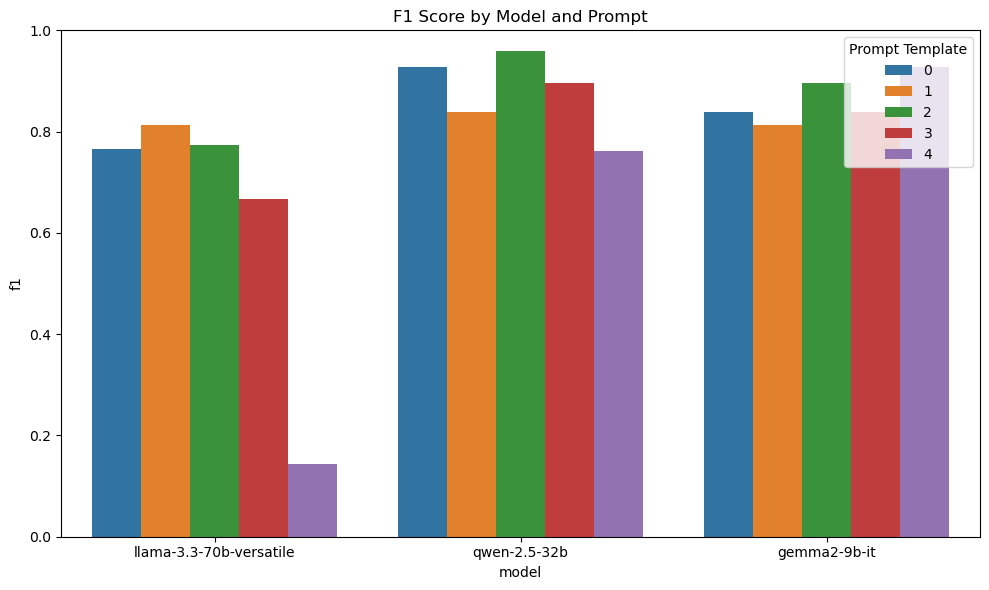

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="model", y="f1", hue="id")
plt.title("F1 Score by Model and Prompt")
plt.ylim(0, 1)
plt.legend(title="Prompt Template")
plt.tight_layout()
plt.show()


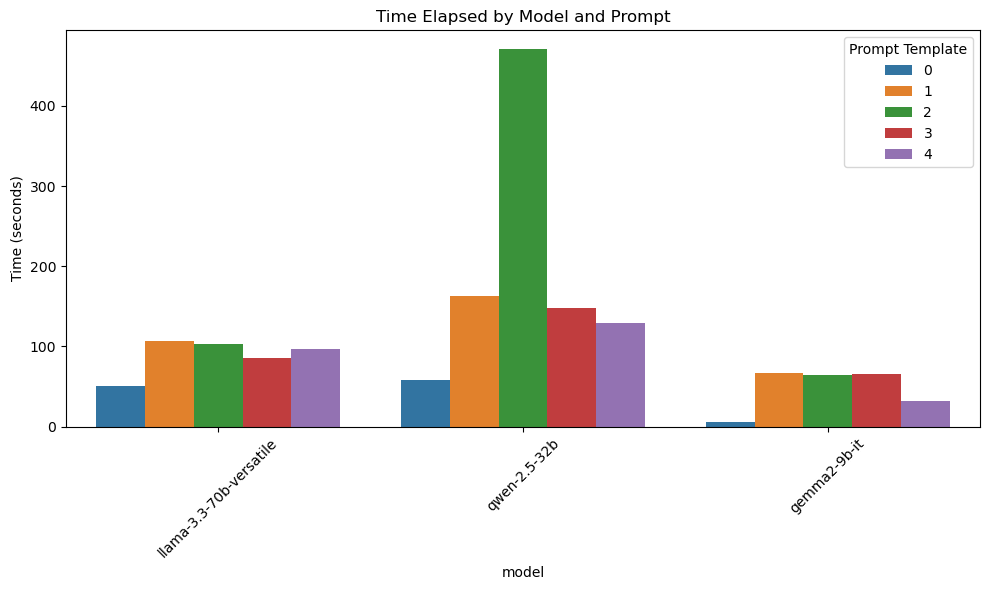

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="model", y="time-elapsed", hue="id")
plt.title("Time Elapsed by Model and Prompt")
plt.ylabel("Time (seconds)")
plt.legend(title="Prompt Template")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [22]:
#prompt_template0 with llama
pred, true = approach1(patient_records2[0:5], llm_client, prompt_template=prompt_template0)

Processing records: 100%|██████████| 5/5 [00:01<00:00,  2.63record/s]

accuracy of model over 5 generated records: 1.0
precision of model over 5 generated records: 1.0
recall of model over 5 generated records: 1.0
f1 of model over 5 generated records: 1.0


In [23]:
#prompt_template0 with qwen
pred, true = approach1(patient_records2[0:5], llm_client2, prompt_template=prompt_template0)

Processing records: 100%|██████████| 5/5 [00:01<00:00,  2.73record/s]

accuracy of model over 5 generated records: 1.0
precision of model over 5 generated records: 1.0
recall of model over 5 generated records: 1.0
f1 of model over 5 generated records: 1.0


### playing around with prompt templates and dif models

In [8]:
from llms.llm_interaction import OpenAIClient, AnthropicClient

gpt4o = OpenAIClient(model="gpt-4o")
sonnet = AnthropicClient(model="claude-3-5-sonnet-20240620")
versatile = GroqClient(model="llama-3.3-70b-versatile")

prompt_template = "Check if this semantic regex - {regex} - exists in the following patient record - {record_text}."
system_prompt = "You are a helpful AI assistant that only answers True or False based on patient data and provided semantic regex matching."

pred, true = approach1(patient_records2[0:5], gpt4o, prompt_template=prompt_template, system_prompt=system_prompt)
pred, true = approach1(patient_records2[0:5], sonnet, prompt_template=prompt_template, system_prompt=system_prompt)
pred, true = approach1(patient_records2[0:5], versatile, prompt_template=prompt_template, system_prompt=system_prompt)



OpenAI client initialized with model: gpt-4o
Claude client initialized with model: claude-3-5-sonnet-20240620
Groq client initialized with model: llama-3.3-70b-versatile


Processing records:  40%|████      | 2/5 [00:00<00:00,  5.80record/s]

Error generating text with OpenAI: Error code: 401 - {'error': {'message': 'Incorrect API key provided: your_ope************here. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}
Error generating text with OpenAI: Error code: 401 - {'error': {'message': 'Incorrect API key provided: your_ope************here. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}


Processing records:  80%|████████  | 4/5 [00:00<00:00,  6.82record/s]

Error generating text with OpenAI: Error code: 401 - {'error': {'message': 'Incorrect API key provided: your_ope************here. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}
Error generating text with OpenAI: Error code: 401 - {'error': {'message': 'Incorrect API key provided: your_ope************here. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}


Processing records: 100%|██████████| 5/5 [00:00<00:00,  6.59record/s]


Error generating text with OpenAI: Error code: 401 - {'error': {'message': 'Incorrect API key provided: your_ope************here. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}
accuracy of model over 5 generated records: 0.4
precision of model over 5 generated records: 0.0
recall of model over 5 generated records: 0.0
f1 of model over 5 generated records: 0.0


Processing records:  60%|██████    | 3/5 [00:00<00:00,  7.53record/s]

Error generating text with Claude: Error code: 401 - {'type': 'error', 'error': {'type': 'authentication_error', 'message': 'invalid x-api-key'}}
Error generating text with Claude: Error code: 401 - {'type': 'error', 'error': {'type': 'authentication_error', 'message': 'invalid x-api-key'}}
Error generating text with Claude: Error code: 401 - {'type': 'error', 'error': {'type': 'authentication_error', 'message': 'invalid x-api-key'}}


Processing records: 100%|██████████| 5/5 [00:00<00:00,  8.70record/s]


Error generating text with Claude: Error code: 401 - {'type': 'error', 'error': {'type': 'authentication_error', 'message': 'invalid x-api-key'}}
Error generating text with Claude: Error code: 401 - {'type': 'error', 'error': {'type': 'authentication_error', 'message': 'invalid x-api-key'}}
accuracy of model over 5 generated records: 0.4
precision of model over 5 generated records: 0.0
recall of model over 5 generated records: 0.0
f1 of model over 5 generated records: 0.0


Processing records: 100%|██████████| 5/5 [00:09<00:00,  1.93s/record]

accuracy of model over 5 generated records: 0.4
precision of model over 5 generated records: 0.0
recall of model over 5 generated records: 0.0
f1 of model over 5 generated records: 0.0
